# California Housing Price Prediction — Data Cleaning & EDA

**Goal (research question):** Build a model to predict California home prices (target: `median_house_value`) using publicly available housing features.

**Dataset:** `housing.csv` (local file in this project folder).

This notebook covers:
- Data loading and sanity checks
- Missing values and duplicates
- Outlier analysis
- Exploratory Data Analysis (EDA)
- Feature engineering ideas to support modeling

> Tip: Run cells top-to-bottom.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

DATA_PATH = Path(r"./data/housing.csv")
df = pd.read_csv(DATA_PATH)

pd.set_option("display.max_columns", 50)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
# Basic overview
print("Shape:", df.shape)
display(df.info())
display(df.describe(include="all").T)

Shape: (21613, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,21613.0,NaN,NaN,NaN,10806.0,6239.28002,0.0,5403.0,10806.0,16209.0,21612.0
id,21613.0,NaN,NaN,NaN,4580301520.864988,2876565571.312057,1000102.0,2123049194.0,3904930410.0,7308900445.0,9900000190.0
date,21613,372,20140623T000000,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,21613.0,NaN,NaN,NaN,540088.141767,367127.196483,75000.0,321950.0,450000.0,645000.0,7700000.0
bedrooms,21600.0,NaN,NaN,NaN,3.37287,0.926657,1.0,3.0,3.0,4.0,33.0
bathrooms,21603.0,NaN,NaN,NaN,2.115736,0.768996,0.5,1.75,2.25,2.5,8.0
sqft_living,21613.0,NaN,NaN,NaN,2079.899736,918.440897,290.0,1427.0,1910.0,2550.0,13540.0
sqft_lot,21613.0,NaN,NaN,NaN,15106.967566,41420.511515,520.0,5040.0,7618.0,10688.0,1651359.0
floors,21613.0,NaN,NaN,NaN,1.494309,0.539989,1.0,1.0,1.5,2.0,3.5
waterfront,21613.0,NaN,NaN,NaN,0.007542,0.086517,0.0,0.0,0.0,0.0,1.0


In [3]:
# Missing values
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)
missing_table = pd.DataFrame({"missing": missing, "missing_pct": missing_pct})
display(missing_table.head(10))

# Duplicates
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

,missing,missing_pct
bedrooms,13,0.06
bathrooms,10,0.05
Unnamed: 0,0,0.00
grade,0,0.00
sqft_living15,0,0.00
long,0,0.00
lat,0,0.00
zipcode,0,0.00
yr_renovated,0,0.00
yr_built,0,0.00


Duplicate rows: 0


In [4]:
# Handle missing values
# In this dataset, missing values are typically in total_bedrooms.
# We'll impute later inside a model pipeline, but for EDA we can make a copy with simple imputation.

df_eda = df.copy()
if df_eda["bedrooms"].isna().any():
    median_bedrooms = df_eda["bedrooms"].median()
    df_eda["bedrooms"] = df_eda["bedrooms"].fillna(median_bedrooms)

if df_eda["bathrooms"].isna().any():
    median_bathrooms = df_eda["bathrooms"].median()
    df_eda["bathrooms"] = df_eda["bathrooms"].fillna(median_bathrooms)

df_eda.isna().sum().head()

Unnamed: 0    0
id            0
date          0
price         0
bedrooms      0
dtype: int64

In [5]:
# Outlier analysis (IQR method) on selected numeric columns
numeric_cols = df_eda.select_dtypes(include=[np.number]).columns.tolist()
check_cols = ["price", "sqft_living", "bedrooms", "yr_built", "zipcode"]

def iqr_outlier_summary(data, cols):
    rows = []
    for c in cols:
        q1, q3 = data[c].quantile([0.25, 0.75])
        iqr = q3 - q1
        lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
        outliers = ((data[c] < lower) | (data[c] > upper)).sum()
        rows.append({
            "column": c,
            "q1": q1,
            "q3": q3,
            "iqr": iqr,
            "lower": lower,
            "upper": upper,
            "outlier_count": int(outliers),
            "outlier_pct": float(outliers / len(data) * 100)
        })
    return pd.DataFrame(rows).sort_values("outlier_count", ascending=False)

outlier_table = iqr_outlier_summary(df_eda, check_cols)
display(outlier_table)

,column,q1,q3,iqr,lower,upper,outlier_count,outlier_pct
0,price,321950.0,645000.0,323050.0,-162625.0,1129575.0,1146,5.302364
1,sqft_living,1427.0,2550.0,1123.0,-257.5,4234.5,572,2.646555
2,bedrooms,3.0,4.0,1.0,1.5,5.5,533,2.466108
3,yr_built,1951.0,1997.0,46.0,1882.0,2066.0,0,0.000000
4,zipcode,98033.0,98118.0,85.0,97905.5,98245.5,0,0.000000


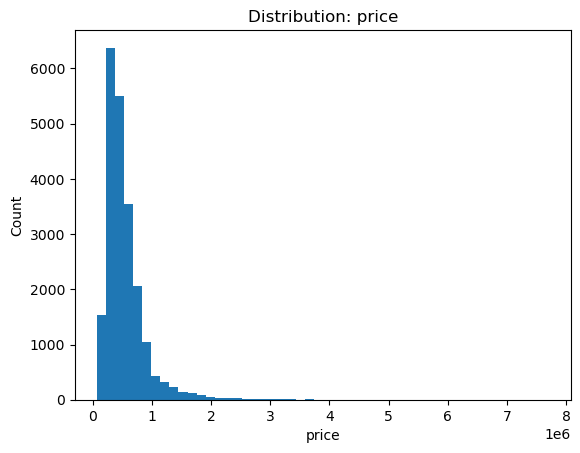

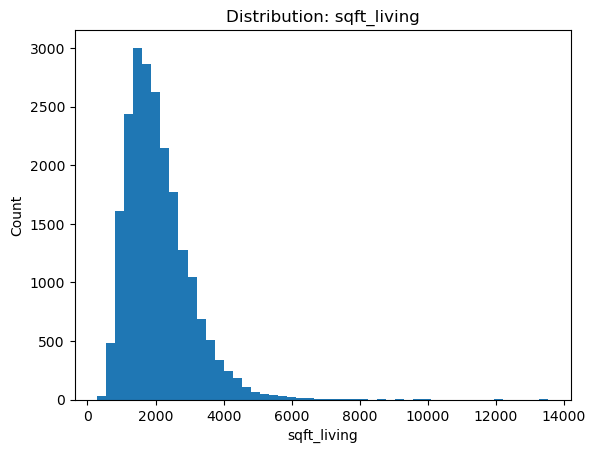

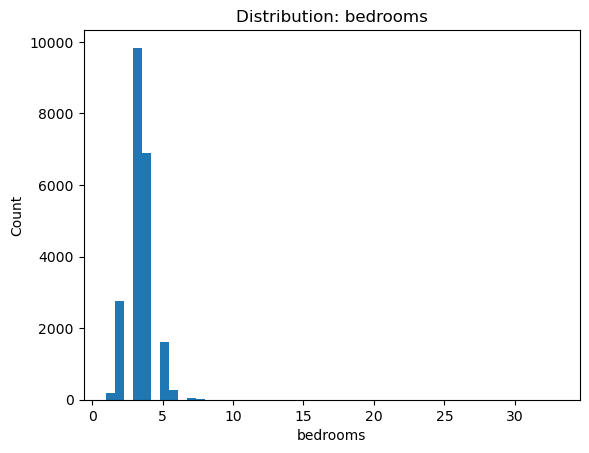

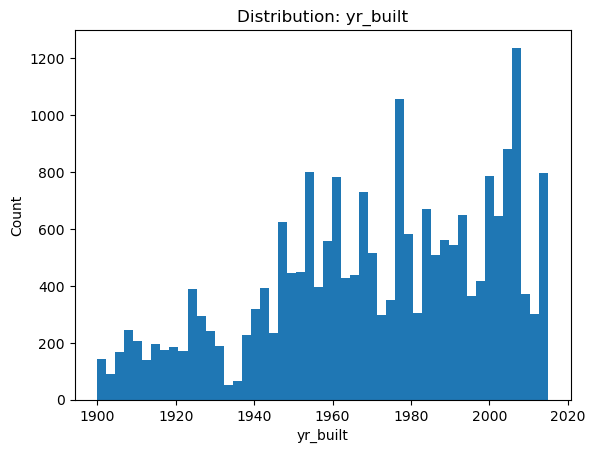

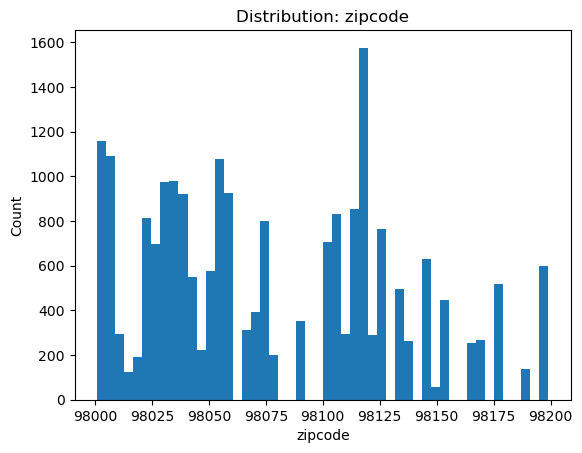

In [6]:
# Distributions
num_plot_cols = ["price", "sqft_living", "bedrooms", "yr_built", "zipcode"]
for c in num_plot_cols:
    plt.figure()
    plt.hist(df_eda[c], bins=50)
    plt.title(f"Distribution: {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.show()

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525714
view             0.397293
sqft_basement    0.323816
bedrooms         0.308868
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
Unnamed: 0       0.027372
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

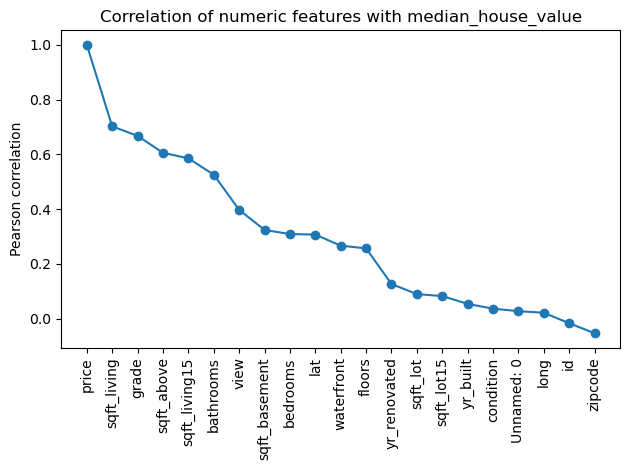

In [7]:
# Correlations with target
target = "price"
corr = df_eda.select_dtypes(include=[np.number]).corr(numeric_only=True)[target].sort_values(ascending=False)
display(corr)

plt.figure()
plt.plot(corr.values, marker="o")
plt.title("Correlation of numeric features with median_house_value")
plt.xticks(range(len(corr.index)), corr.index, rotation=90)
plt.ylabel("Pearson correlation")
plt.tight_layout()
plt.show()

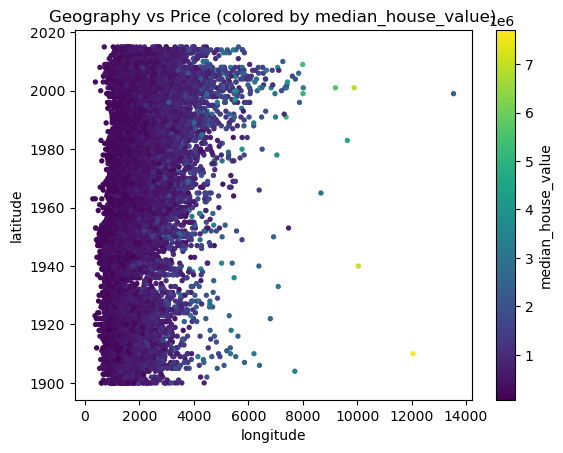

In [8]:
# Geo scatter: longitude vs latitude, colored by price
plt.figure()
plt.scatter(df_eda["sqft_living"], df_eda["yr_built"], c=df_eda["price"], s=8)
plt.title("Geography vs Price (colored by median_house_value)")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.colorbar(label="median_house_value")
plt.show()

zipcode
98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: count, Length: 70, dtype: int64

<Figure size 640x480 with 0 Axes>

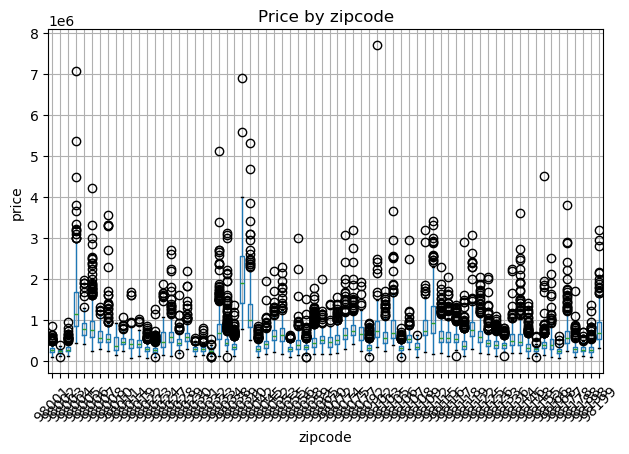

In [9]:
# Categorical exploration: ocean_proximity
display(df_eda["zipcode"].value_counts())

plt.figure()
df_eda.boxplot(column="price", by="zipcode", rot=45)
plt.title("Price by zipcode")
plt.suptitle("")
plt.xlabel("zipcode")
plt.ylabel("price")
plt.tight_layout()
plt.show()

In [10]:
'''
Modeling, CV, and Grid Search

Train/test split
Preprocessing with a scikit-learn Pipeline
Multiple regression models (baseline + linear + tree-based)
Cross-validation (CV)
Grid search for hyperparameters
Metric choice + interpretation (RMSE/MAE/R²)
Final model selection and test evaluation


Why RMSE?

House price errors should be in the same unit as the target (dollars).
RMSE penalizes large errors more than MAE, which is useful when big misses are costly.
'''

'\nModeling, CV, and Grid Search\n\nTrain/test split\nPreprocessing with a scikit-learn Pipeline\nMultiple regression models (baseline + linear + tree-based)\nCross-validation (CV)\nGrid search for hyperparameters\nMetric choice + interpretation (RMSE/MAE/R²)\nFinal model selection and test evaluation\n\n\nWhy RMSE?\n\nHouse price errors should be in the same unit as the target (dollars).\nRMSE penalizes large errors more than MAE, which is useful when big misses are costly.\n'

In [11]:
import time

from sklearn.model_selection import train_test_split, KFold, cross_validate, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import joblib

In [12]:
# Separate features/target
target = "price"
X = df.drop(columns=[target])
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (17290, 21) Test: (4323, 21)


In [13]:
# Preprocessing: numeric imputation + scaling, categorical imputation + one-hot
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder="drop"
)

numeric_features, categorical_features

(['Unnamed: 0',
  'id',
  'bedrooms',
  'bathrooms',
  'sqft_living',
  'sqft_lot',
  'floors',
  'waterfront',
  'view',
  'condition',
  'grade',
  'sqft_above',
  'sqft_basement',
  'yr_built',
  'yr_renovated',
  'zipcode',
  'lat',
  'long',
  'sqft_living15',
  'sqft_lot15'],
 ['date'])

In [14]:
# Metrics
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

rmse_scorer = make_scorer(rmse, greater_is_better=False)  # negative for CV so higher is better internally

scoring = {
    "rmse": rmse_scorer,   # negative RMSE
    "mae": "neg_mean_absolute_error",
    "r2": "r2"
}

/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.653e+13, tolerance: 1.847e+11
  model = cd_fast.sparse_enet_coordinate_descent(
/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.585e+13, tolerance: 1.841e+11
  model = cd_fast.sparse_enet_coordinate_descent(
/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.562e+13, tolerance: 1.780e+11
  model = cd

,Model,CV RMSE (mean),CV RMSE (std),CV MAE (mean),CV R2 (mean),CV Fit Time (s),Total CV Time (s)
4,RandomForest,1.706497e+10,3.096090e+09,70485.912969,0.870083,128.1816,642.016
5,GradientBoosting,1.707819e+10,1.122188e+09,76733.584125,0.868044,5.2190,26.270
2,Ridge,4.018522e+10,5.491382e+09,127119.680580,0.692369,0.1128,0.671
3,Lasso,4.043248e+10,5.326122e+09,127400.390538,0.690281,124.7766,624.028
1,LinearRegression,4.045818e+10,5.317240e+09,127484.687470,0.690073,0.1772,0.988
0,Dummy (median),1.383536e+11,1.809334e+10,219836.751706,-0.059388,0.0736,0.474


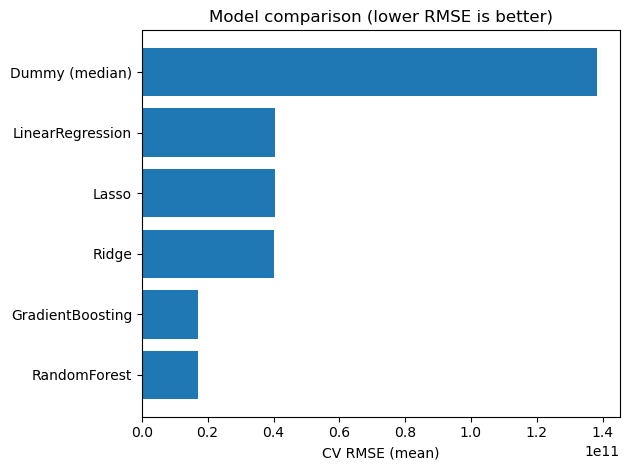

In [15]:
# Models to compare
models = {
    "Dummy (median)": DummyRegressor(strategy="median"),
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(random_state=42),
    "Lasso": Lasso(random_state=42, max_iter=20000),
    "RandomForest": RandomForestRegressor(random_state=42, n_jobs=-1),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)


rows = []
for name, model in models.items():
    pipe = Pipeline(steps=[("preprocess", preprocess), ("model", model)])
    start = time.time()
    cv_res = cross_validate(pipe, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    elapsed = time.time() - start

    rows.append({
        "Model": name,
        "CV RMSE (mean)": -cv_res["test_rmse"].mean(),
        "CV RMSE (std)": cv_res["test_rmse"].std(),
        "CV MAE (mean)": -cv_res["test_mae"].mean(),
        "CV R2 (mean)": cv_res["test_r2"].mean(),
        "CV Fit Time (s)": cv_res["fit_time"].mean(),
        "Total CV Time (s)": elapsed
    })

cv_table = pd.DataFrame(rows).sort_values("CV RMSE (mean)")
display(cv_table)

plt.figure()
plt.barh(cv_table["Model"], cv_table["CV RMSE (mean)"])
plt.title("Model comparison (lower RMSE is better)")
plt.xlabel("CV RMSE (mean)")
plt.tight_layout()
plt.show()

In [16]:
'''
Grid Search (hyperparameter tuning)
We tune a couple of competitive models.

Notes:

We run grid search inside the full Pipeline to avoid leakage.
CV scoring uses negative RMSE, so the best model has the highest (least negative) score.
'''

'\nGrid Search (hyperparameter tuning)\nWe tune a couple of competitive models.\n\nNotes:\n\nWe run grid search inside the full Pipeline to avoid leakage.\nCV scoring uses negative RMSE, so the best model has the highest (least negative) score.\n'

In [17]:
# Grid Search: Ridge
ridge_pipe = Pipeline(steps=[("preprocess", preprocess), ("model", Ridge(random_state=42))])

ridge_grid = {
    "model__alpha": [0.1, 1.0, 10.0, 50.0, 100.0],
    "model__solver": ["auto"]
}

ridge_search = GridSearchCV(
    ridge_pipe,
    param_grid=ridge_grid,
    cv=cv,
    scoring=rmse_scorer,  # negative RMSE
    n_jobs=-1
)

start = time.time()
ridge_search.fit(X_train, y_train)
ridge_time = time.time() - start

print("Best params:", ridge_search.best_params_)
print("Best CV RMSE:", -ridge_search.best_score_)
print("Grid search time (s):", ridge_time)

Best params: {'model__alpha': 100.0, 'model__solver': 'auto'}
Best CV RMSE: 39541171932.69439
Grid search time (s): 3.255999803543091


In [ ]:
# Grid Search: RandomForest (smaller grid to keep runtime reasonable)
rf_pipe = Pipeline(steps=[("preprocess", preprocess), ("model", RandomForestRegressor(random_state=42, n_jobs=-1))])

rf_grid = {
    "model__n_estimators": [200, 400],
    "model__max_depth": [None, 20, 40],
    "model__min_samples_split": [2, 10],
    "model__min_samples_leaf": [1, 4]
}

rf_search = GridSearchCV(
    rf_pipe,
    param_grid=rf_grid,
    cv=cv,
    scoring=rmse_scorer,
    n_jobs=-1
)

start = time.time()
rf_search.fit(X_train, y_train)
rf_time = time.time() - start

print("Best params:", rf_search.best_params_)
print("Best CV RMSE:", -rf_search.best_score_)
print("Grid search time (s):", rf_time)

In [ ]:
# Grid Search: GradientBoostingRegressor
gb_pipe = Pipeline(steps=[("preprocess", preprocess), ("model", GradientBoostingRegressor(random_state=42))])

gb_grid = {
    "model__n_estimators": [200, 400],
    "model__learning_rate": [0.05, 0.1],
    "model__max_depth": [2, 3]
}

gb_search = GridSearchCV(
    gb_pipe,
    param_grid=gb_grid,
    cv=cv,
    scoring=rmse_scorer,
    n_jobs=-1
)

start = time.time()
gb_search.fit(X_train, y_train)
gb_time = time.time() - start

print("Best params:", gb_search.best_params_)
print("Best CV RMSE:", -gb_search.best_score_)
print("Grid search time (s):", gb_time)

In [ ]:
# Compare tuned models + pick the best by CV RMSE
tuned = [
    ("Ridge (tuned)", ridge_search),
    ("RandomForest (tuned)", rf_search),
    ("GradientBoosting (tuned)", gb_search),
]

tuned_rows = []
for name, search in tuned:
    tuned_rows.append({
        "Model": name,
        "Best CV RMSE": -search.best_score_,
        "Best Params": search.best_params_
    })
tuned_table = pd.DataFrame(tuned_rows).sort_values("Best CV RMSE")
display(tuned_table)

best_search = min(tuned, key=lambda x: -x[1].best_score_)[1]  # min RMSE
best_model = best_search.best_estimator_
best_model

In [ ]:
# Evaluate on the held-out test set
best_model.fit(X_train, y_train)
pred = best_model.predict(X_test)

test_rmse = rmse(y_test, pred)
test_mae = mean_absolute_error(y_test, pred)
test_r2 = r2_score(y_test, pred)

print("TEST RMSE:", test_rmse)
print("TEST MAE :", test_mae)
print("TEST R2  :", test_r2)

# Residual plot
residuals = y_test - pred
plt.figure()
plt.scatter(pred, residuals, s=8)
plt.axhline(0)
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted median_house_value")
plt.ylabel("Residuals (actual - predicted)")
plt.tight_layout()
plt.show()

In [ ]:
# Save the final model (pipeline)
MODEL_PATH = Path("final_model.joblib")
joblib.dump(best_model, MODEL_PATH)
print("Saved:", MODEL_PATH.resolve())